# <span style = "color:green"> Twitter Sentiment Analysis </span>

***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('twitter.csv')

In [3]:
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [18]:
data = df[['text','sentiment']]

In [19]:
data.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [21]:
data['sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [22]:
def change(a):
    if a == 'Neutral':
        return 0
    elif a == 'Positive':
        return 1
    else:
        return -1

In [23]:
data['sentiment'] = data['sentiment'].apply(change)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2284\1469316066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['sentiment'].apply(change)


In [24]:
data.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,0
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,1
2,RT @TJMShow: No mention of Tamir Rice and the ...,0
3,RT @RobGeorge: That Carly Fiorina is trending ...,1
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,1


In [25]:
data['sentiment'].unique()

array([ 0,  1, -1], dtype=int64)

In [26]:
data.isna().sum()

text         0
sentiment    0
dtype: int64

In [27]:
data.duplicated().sum()

3304

In [28]:
data.drop_duplicates(keep = 'first',inplace = True )

C:\Users\Hp\AppData\Local\Temp\ipykernel_2284\1347578080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(keep = 'first',inplace = True )


In [29]:
data.duplicated().sum()

0

In [30]:
for i in range(10):
    print(data['text'][i])
    print()

RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate

RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…

RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.

RT @RobGeorge: That Carly Fiorina is trending -- hours after HER debate -- above any of the men in just-completed #GOPdebate says she's on …

RT @DanScavino: #GOPDebate w/ @realDonaldTrump delivered the highest ratings in the history of presidential debates. #Trump2016 http://t.co…

RT @GregAbbott_TX: @TedCruz: "On my first day I will rescind every illegal executive action taken by Barack Obama." #GOPDebate @FoxNews

RT @warriorwoman91: I liked her and was happy when I heard she was going to be the moderator. Not anymore. #GOPDebate @megynkelly  https://…

Going on #MSNBC Live with @ThomasARoberts around 2 PM ET.  #GOPDebate

Deer in the headlights RT @liz

<Axes: xlabel='sentiment', ylabel='count'>

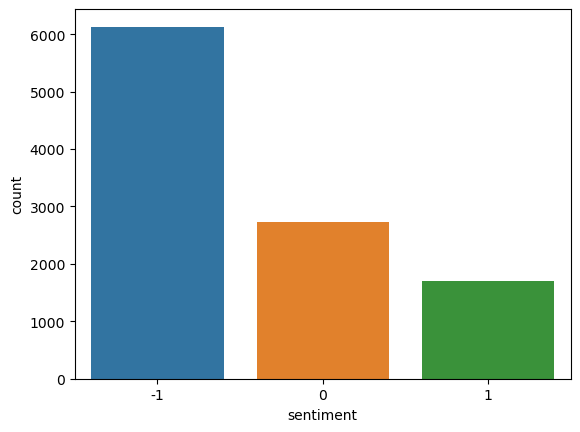

In [31]:
sns.countplot(x = data['sentiment'])

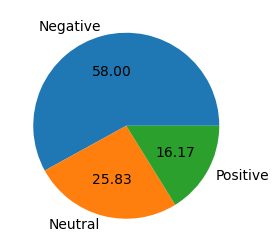

In [32]:
plt.figure(figsize = (3,8))
plt.pie(data['sentiment'].value_counts(), labels = ['Negative', 'Neutral','Positive'], autopct = '%0.2f')
plt.show()

In [33]:
def preprocess(sentence):
    text = re.sub(r"[^a-zA-Z0-9]",' ',sentence).split()
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words]
    word = ' '.join(word)
    return word
    

In [34]:
data['text'] = data['text'].apply(preprocess)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2284\121671028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(preprocess)


In [35]:
for i in range(10):
    print(data['text'][i])
    print()

rt nancyleegrahn how everyone feel climate change question last night exactly gopdebate

rt scottwalker didn catch full gopdebate last night here scott best line 90 second walker16 http co zsff

rt tjmshow no mention tamir rice gopdebate hold cleveland wow

rt robgeorge that carly fiorina trend hours her debate men complete gopdebate say

rt danscavino gopdebate w realdonaldtrump deliver highest rat history presidential debate trump2016 http co

rt gregabbott tx tedcruz on first day i rescind every illegal executive action take barack obama gopdebate foxnews

rt warriorwoman91 i like happy i hear go moderator not anymore gopdebate megynkelly https

go msnbc live thomasaroberts around 2 pm et gopdebate

deer headlights rt lizzwinstead ben carson may brain surgeon perform lobotomy gopdebate

rt nancyosborne180 last night debate prove gopdebate batsask badassteachersa tbats https co g2ggjy1bjd



In [36]:
X = data['text']
y = data['sentiment']

In [37]:
vector = TfidfVectorizer(ngram_range=(2,2))

In [38]:
X = vector.fit_transform(X)

In [39]:
type(X)

scipy.sparse._csr.csr_matrix

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [42]:
X_train.shape

(8453, 71387)

In [43]:
X_test.shape

(2114, 71387)

In [44]:
from sklearn.svm import SVC

In [45]:
model = SVC()

In [46]:
model.fit(X_train,y_train)

SVC()

In [47]:
model.score(X_train,y_train)

0.9595409913640128

In [48]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics

In [50]:
metrics.accuracy_score(y_test,y_pred)

0.5917691579943235

<Axes: >

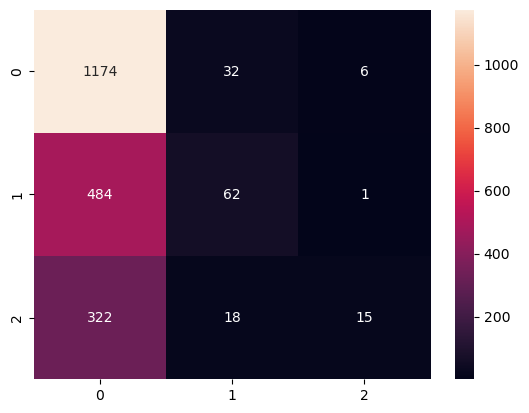

In [51]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

In [52]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.59      0.97      0.74      1212
           0       0.55      0.11      0.19       547
           1       0.68      0.04      0.08       355

    accuracy                           0.59      2114
   macro avg       0.61      0.37      0.33      2114
weighted avg       0.60      0.59      0.48      2114



***